# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer,LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
df = pd.read_csv('dataset/spam.csv',encoding='latin1')
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [3]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.duplicated().sum()

In [19]:
df = df.drop_duplicates(keep='first')

In [20]:
df.shape

(5169, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

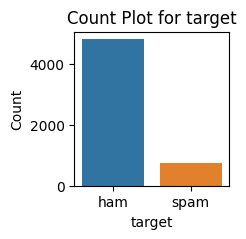

There is imbalance the given dataset


In [7]:
# Churn plot
feature_to_analyze = 'target'
plt.figure(figsize=(2, 2))
sns.countplot(x=feature_to_analyze, data=df)
plt.xlabel(feature_to_analyze)
plt.ylabel("Count")
plt.title(f"Count Plot for {feature_to_analyze}")
plt.show()
print('There is imbalance the given dataset')

In [8]:
label_encoder = LabelEncoder()
df['target']= label_encoder.fit_transform(df['target'])

In [9]:
def text_transform(desc):
    text = desc.lower()
    text = nltk.word_tokenize(text)
    words = [word for word in text if word.isalnum()]
    words = [word for word in words if word not in stopwords.words('english')]

    # Apply stemming using PorterStemmer
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]

    return " ".join(stemmed_words)

def data_preprocessing(df):
    df["transformed_text"] = df['text'].apply(text_transform)
    return df["transformed_text"]

In [10]:
X = df.drop(['target'] ,axis = 1).copy()
y = df['target'].values

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [13]:
# Create a pipeline
pipeline = Pipeline([
    ('data_preprocessing', FunctionTransformer(func=data_preprocessing, validate=False)),
    ('vectorization', TfidfVectorizer(max_features=3000)),
    ('SVC', SVC(kernel='sigmoid', gamma=1.0))
])

In [14]:
# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


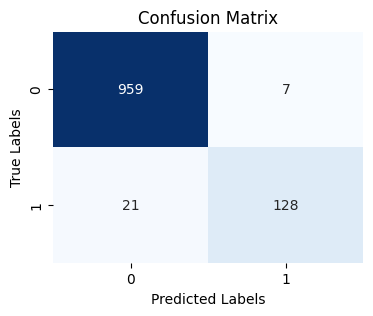

In [15]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cn = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cn, annot=True, cmap="Blues", fmt="g", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()